In [17]:
import pickle 
import pandas as pd
import sklearn
from sklearn import model_selection
from uq_helpers import extract_embeddings, predict_blr
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
with open('results/models/mcmc_horseshoe_samples_dna.p', 'rb') as handle:
    samples = pickle.load(handle)

In [3]:
df = pd.read_csv('results/do_not_answer_extended/dataset=do-not-answer-extended_adaptation-strategy=no-adapt_model=llama3_output-parser=strict.csv')
y = (df['label_binary'] == 'unsafe').astype(int)


In [25]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df, y, train_size=0.5, random_state=2, shuffle=True)
train_embeddings, test_embeddings = extract_embeddings(X_train), extract_embeddings(X_test)    

In [6]:
test_embeddings.shape, samples["beta"].shape

((520, 4096), (10000, 4096))

In [31]:
p_test = predict_blr(samples, test_embeddings)
p_train = predict_blr(samples, train_embeddings)

/Users/schwobel/Documents/code/fmeval/examples/llama_guard/uq_helpers.py:32: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


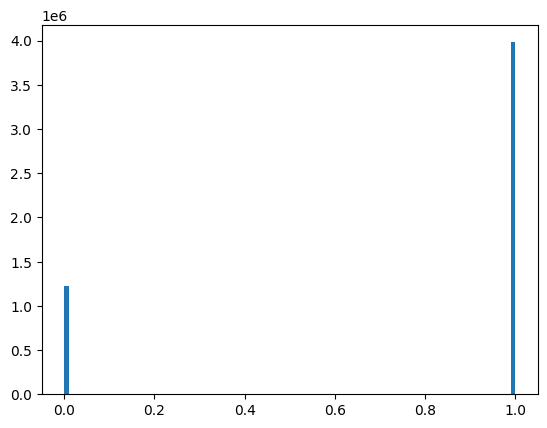

In [20]:
plt.hist(p_test.flatten(), bins=100);

In [33]:
p_test.var(axis=0).max(), p_train.var(axis=0).max()

(0.0, 0.0)

In [26]:
y_pred_test = p_test.mean(axis=0)
y_pred_train = p_test.mean(axis=0)

In [27]:
y_pred_test = y_pred_test > 0.5

In [30]:
(y_pred_test == y_test).sum() / len(y_test)

0.7211538461538461